In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 1
df = pd.read_csv('medical_examination.csv')

In [3]:
# 2
df['overweight'] = ((df['weight']/ ((df['height']/100)**2)) > 25 ).astype(int)

In [4]:
# 3 Normalize data
df['gluc']=(df['gluc']> 1).astype(int)
df['cholesterol']=(df['cholesterol']> 1).astype(int)

In [9]:
# 4
def draw_cat_plot():
    # 5
    df_cat = pd.melt(df,
    id_vars=["cardio"],
    value_vars= ["cholesterol", "gluc", "smoke", "alco", "active", "overweight"])

    # 6
    df_cat = (df_cat.groupby(["cardio", "variable", "value"]) .size().reset_index(name="total"))
    

    # 7
    cat_plot = sns.catplot(data=df_cat,x="variable",y="total",hue="value",col="cardio",kind="bar",height=5,aspect=1)
    cat_plot.set_axis_labels("Variable", "Total")
    cat_plot.set_titles("Cardio {col_name}")
    cat_plot.despine(left=True)



    # 8
    fig = cat_plot.fig


    # 9
    fig.savefig('catplot.png')
    return fig

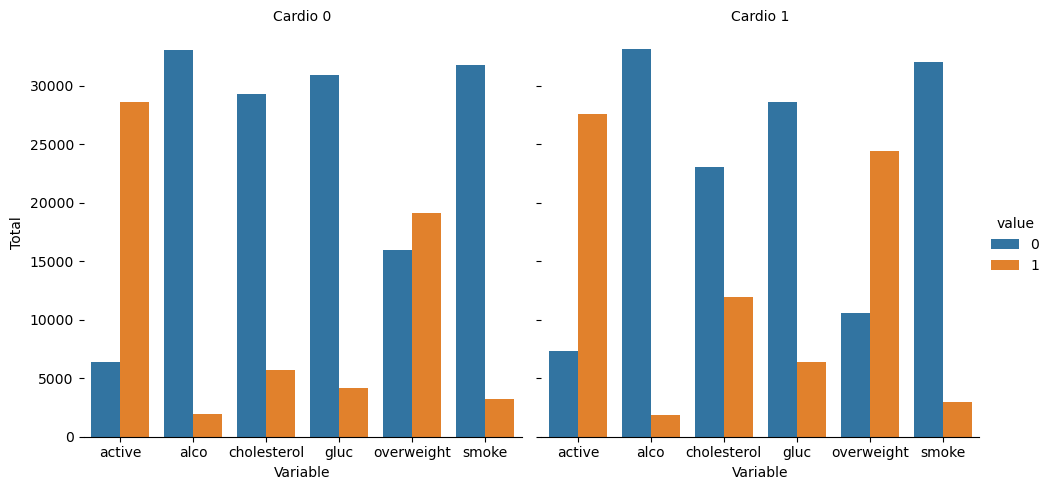

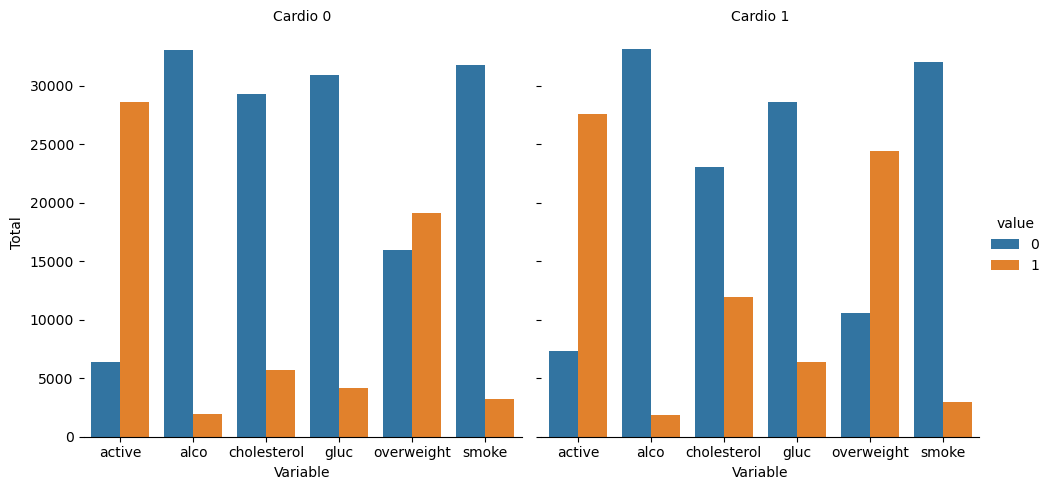

In [10]:
draw_cat_plot()

In [28]:
# 10
def draw_heat_map():
    # 11
    df_heat = df[
           (df['ap_lo'] <= df['ap_hi']) & 
           (df['height'] >= df['height'].quantile(0.025)) &
           (df['height'] <= df['height'].quantile(0.975)) &
           (df['weight'] >= df['weight'].quantile(0.025)) &
           (df['weight'] <= df['weight'].quantile(0.975))]  
    # 12
    corr = df_heat.corr()

    # 13
    mask = np.triu(np.ones_like(corr, dtype= bool))



    # 14
    fig, ax = plt.subplots(figsize=(12,8))

    # 15
    sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', linewidths=0.5, cbar=True, ax=ax,square=True)
    ax.set_title("Correlation Heatmap",fontsize= 16)
    plt.tight_layout()


    # 16
    fig.savefig('heatmap.png')
    return fig


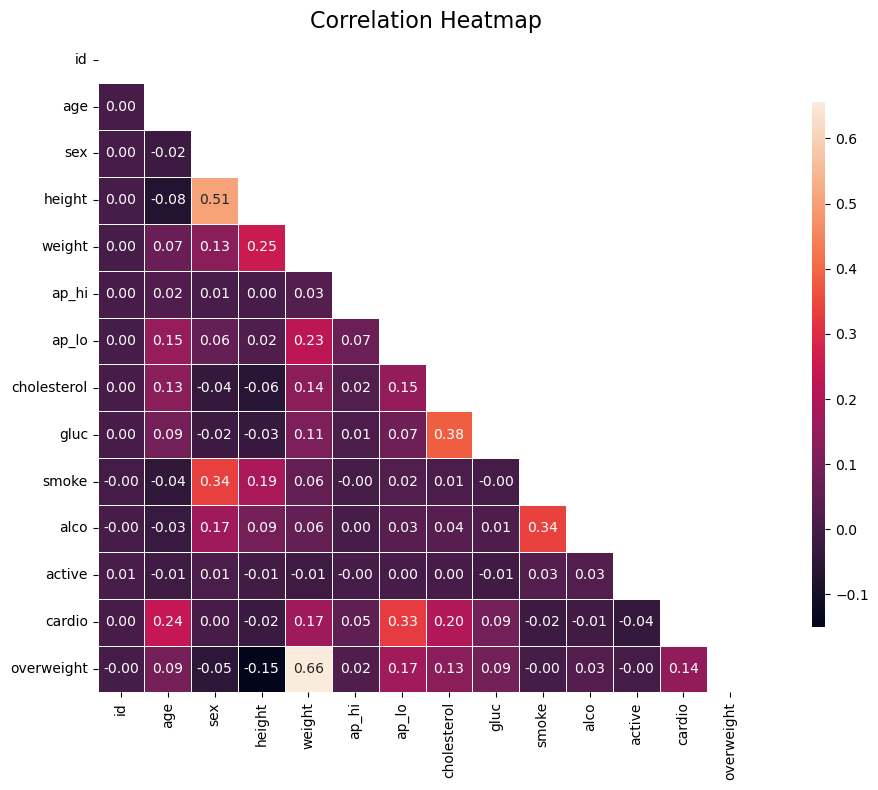

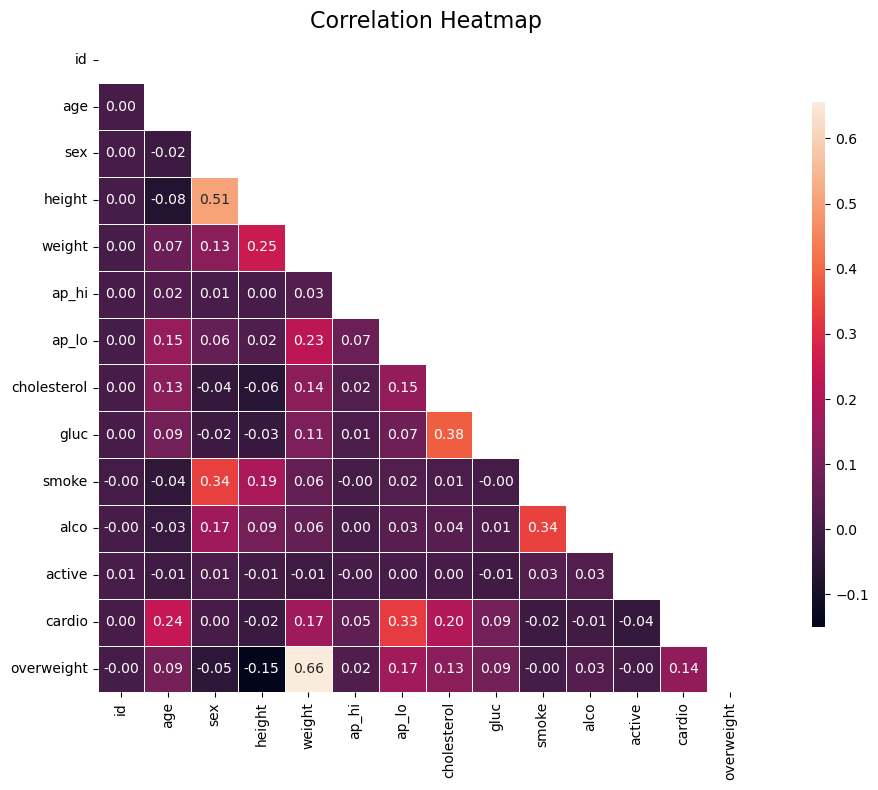

In [29]:
draw_heat_map()